In [1]:
import os
from os.path import join
import numpy as np
import cv2
import matplotlib.pyplot as plt
from edge_extractor_stub import process_piece, plot_side_images
from functools import partial
import traceback

In [2]:
filenames = os.listdir('underwater')
filenames.sort()

In [3]:
def plot_grid(size, out_dict, *image_keys):
    h, w = size
    for idx, img_key in enumerate(image_keys, start=1):
        plt.subplot(h * 100 + w * 10 + idx)
        if img_key[0] == '_':
            plt.imshow(out_dict[img_key[1:]], cmap='gray')
        else:
            plt.imshow(out_dict[img_key])
            
#label_tuples = [('A', 74), ('B', 43), ('C', 19), ('D', 72), ('E', 11)]
label_tuples = [('A', 4), ('B', 18), ('C', 18)]

def create_label(label_tuple):
    letter, max_num = label_tuple
    for i in range(1, max_num + 1):
        label = letter + str(i) if i >= 10 else letter + '0' + str(i)
        yield label
        
labels = []
for label_tuple in label_tuples:
    for label in create_label(label_tuple):
        labels.append(label)

photo_2020-12-17_17-19-57.jpg


/Users/ngzhaoming/opt/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/ngzhaoming/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


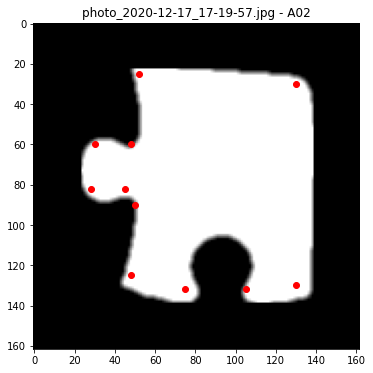

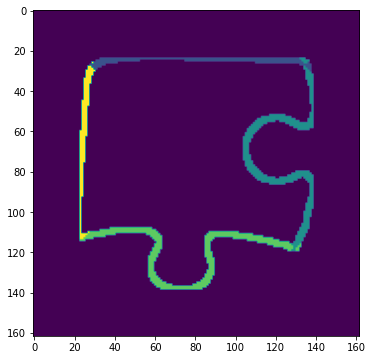

photo_2020-12-17_17-19-59.jpg


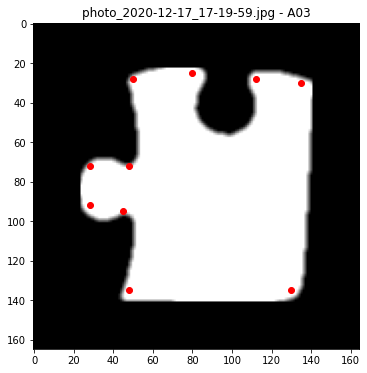

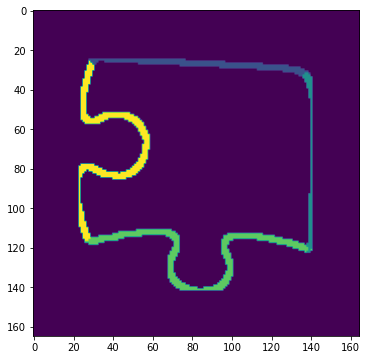

photo_2020-12-17_17-20-01.jpg


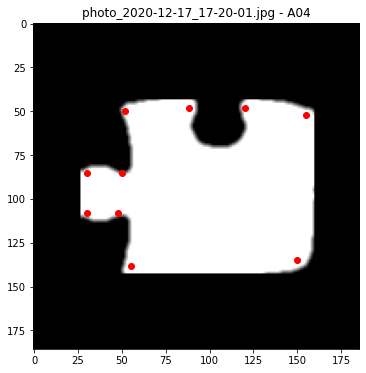

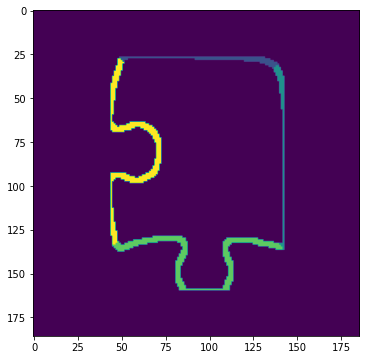

photo_2020-12-17_17-20-02.jpg


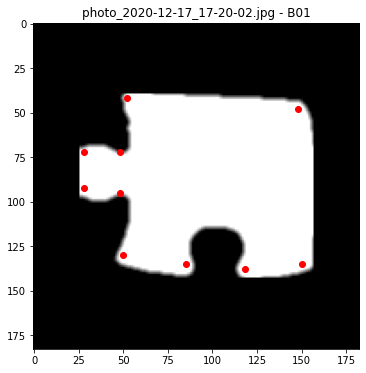

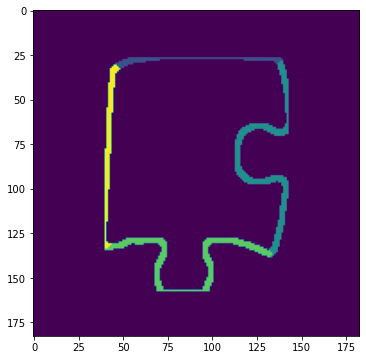

photo_2020-12-17_17-20-03.jpg


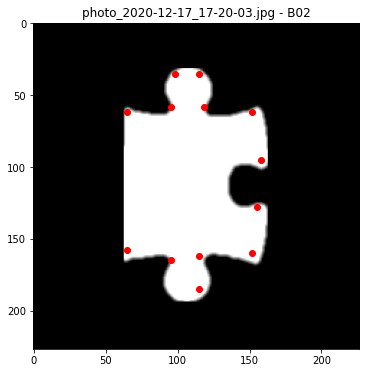

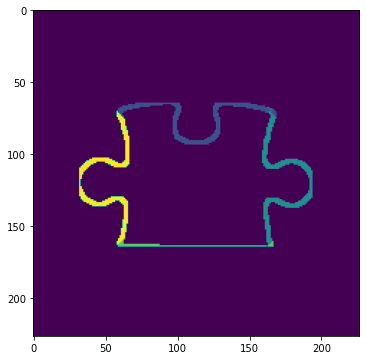

photo_2020-12-17_17-20-04.jpg


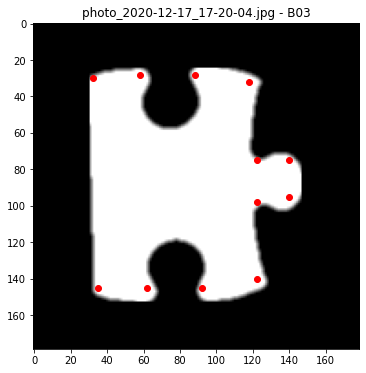

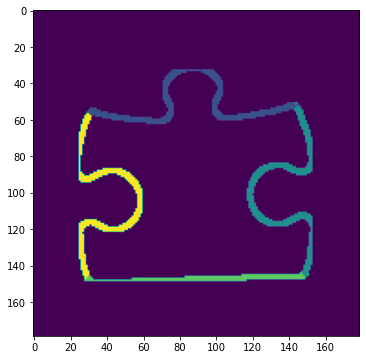

photo_2020-12-17_17-20-05.jpg


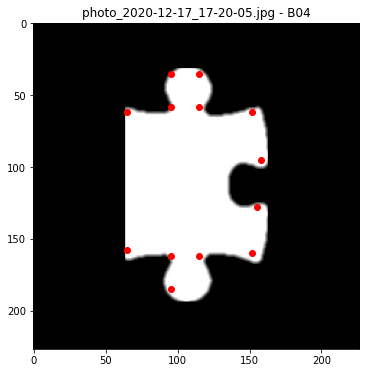

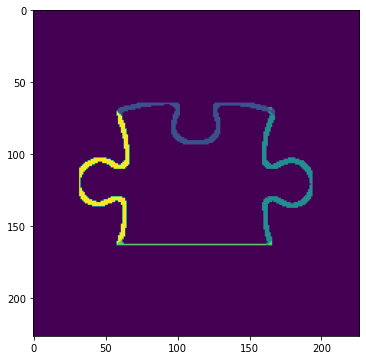

photo_2020-12-17_17-20-06.jpg


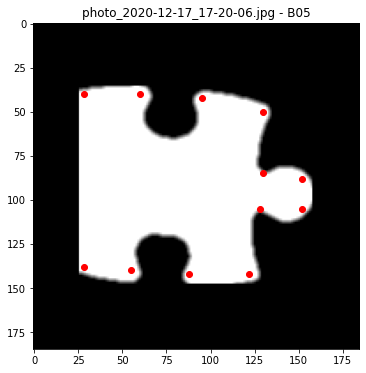

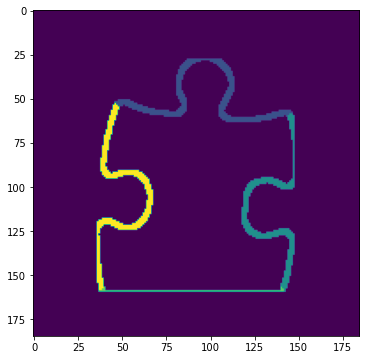

photo_2020-12-17_17-20-07.jpg


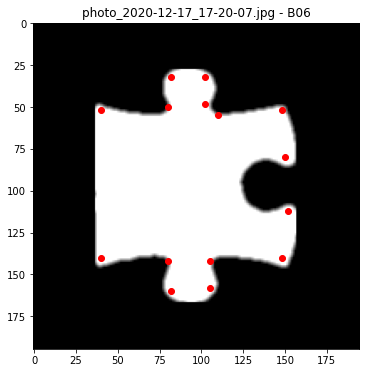

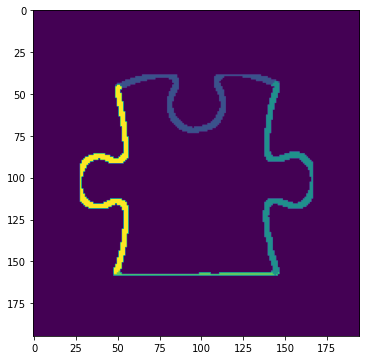

photo_2020-12-17_17-20-08.jpg


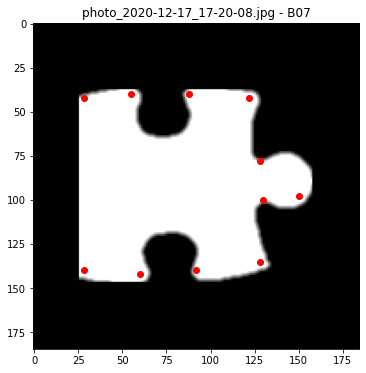

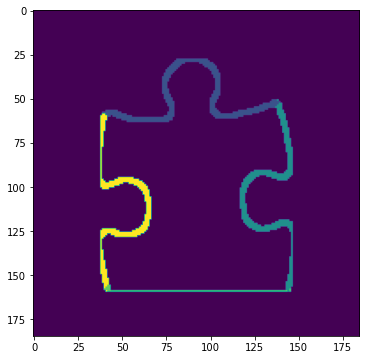

photo_2020-12-17_17-20-09.jpg


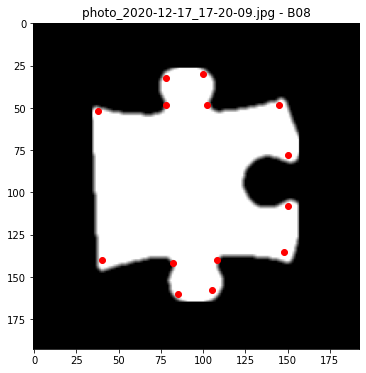

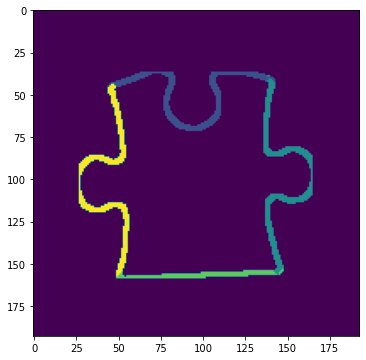

photo_2020-12-17_17-20-11.jpg


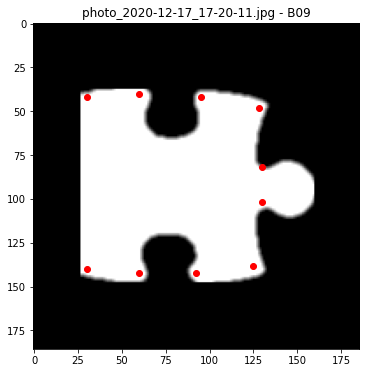

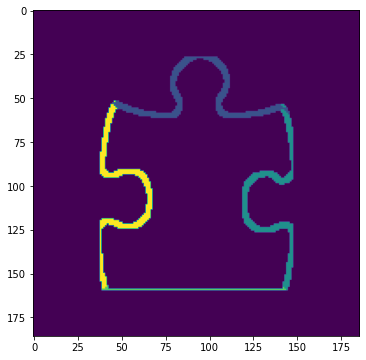

photo_2020-12-17_17-20-12.jpg


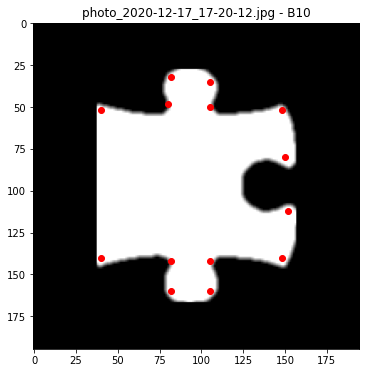

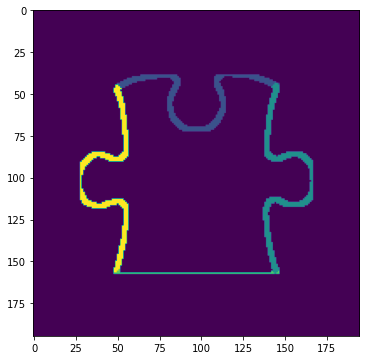

photo_2020-12-17_17-20-13.jpg


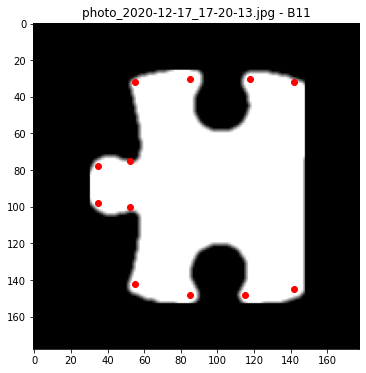

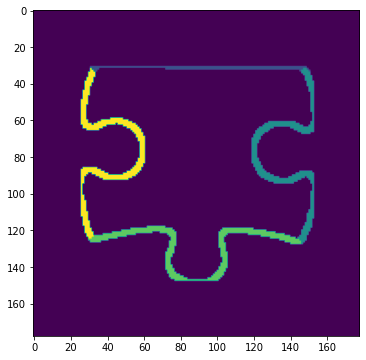

photo_2020-12-17_17-20-14.jpg


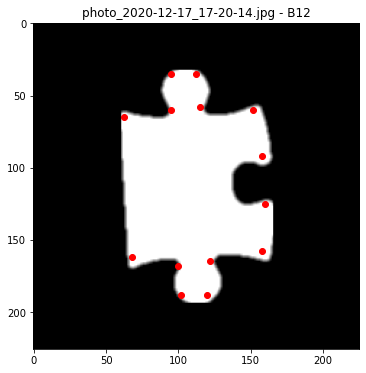

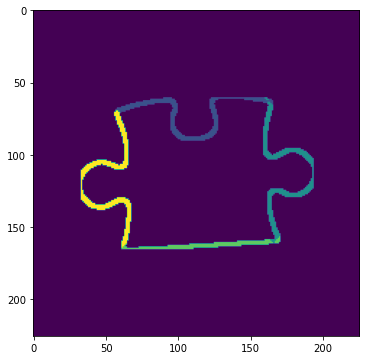

photo_2020-12-17_17-20-15.jpg


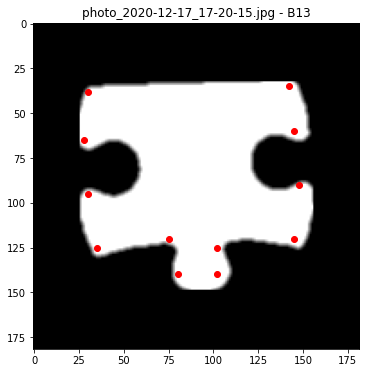

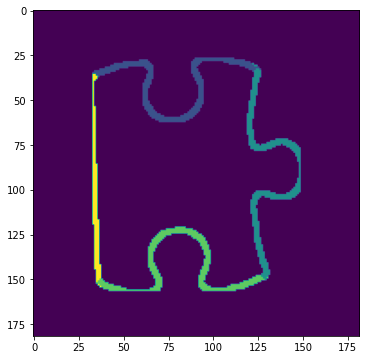

photo_2020-12-17_17-20-16.jpg


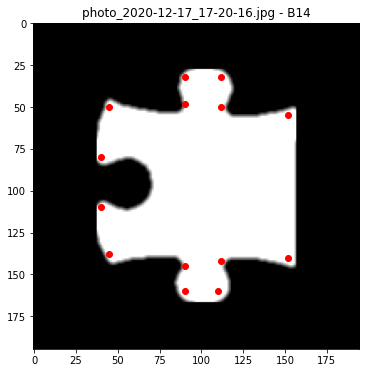

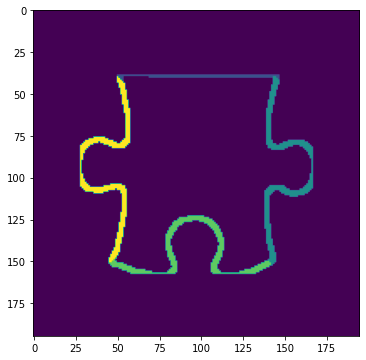

photo_2020-12-17_17-20-17.jpg


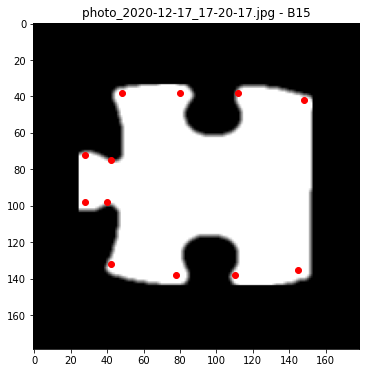

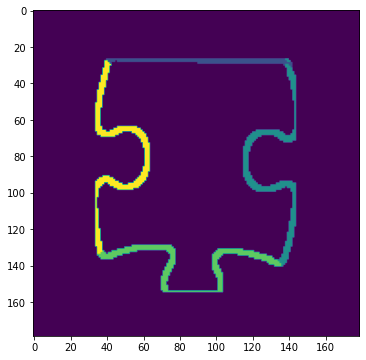

photo_2020-12-17_17-20-18.jpg


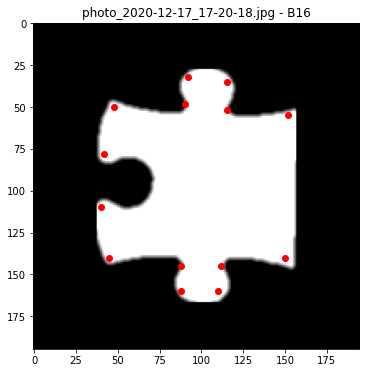

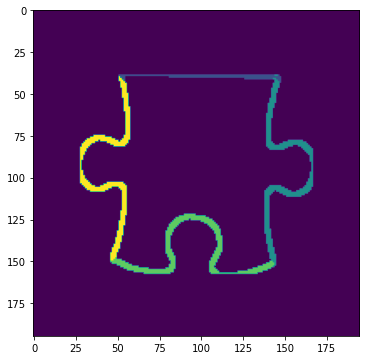

photo_2020-12-17_17-20-19.jpg


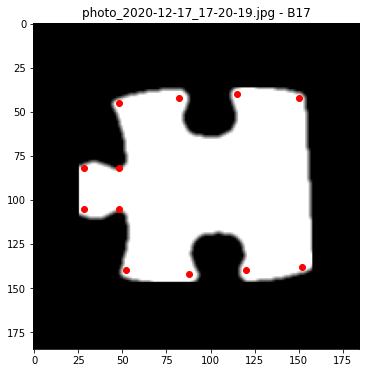

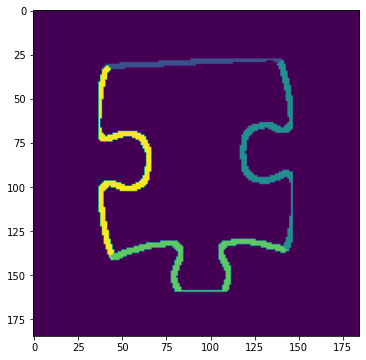

photo_2020-12-17_17-20-22.jpg


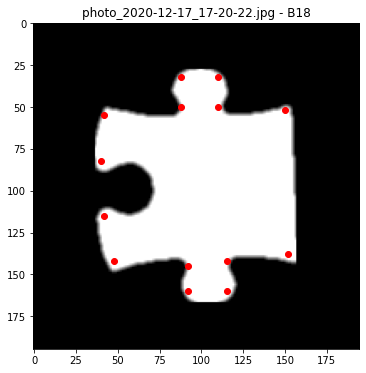

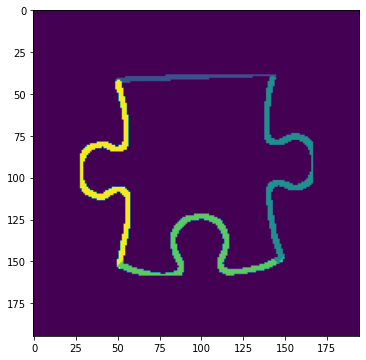

photo_2020-12-17_17-20-25.jpg


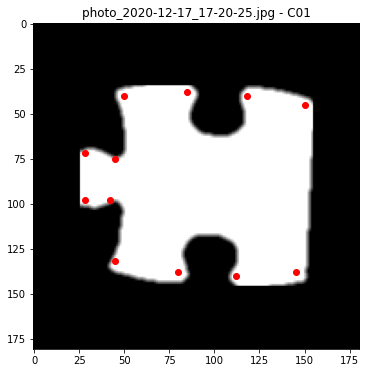

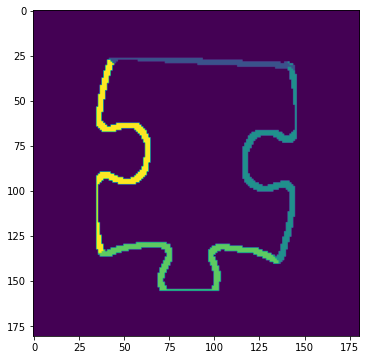

photo_2020-12-17_17-20-26.jpg


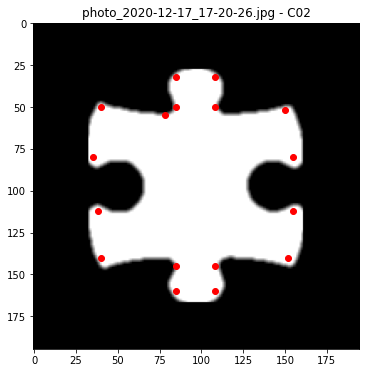

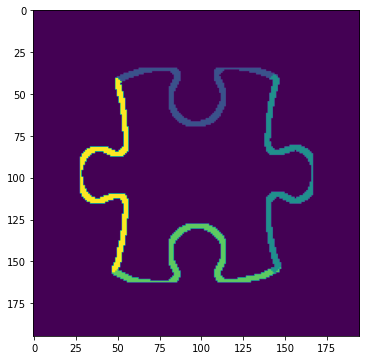

photo_2020-12-17_17-20-27.jpg


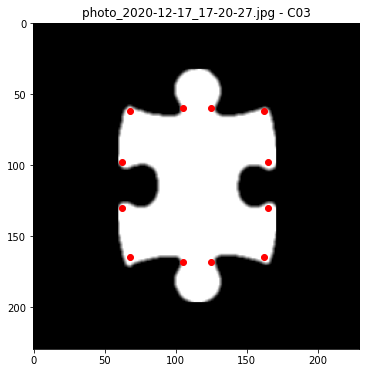

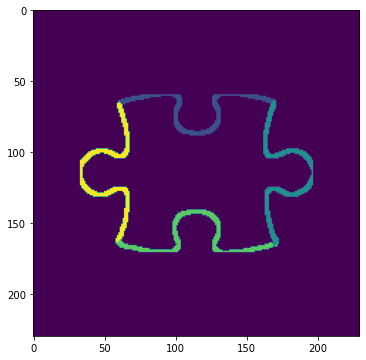

photo_2020-12-17_17-20-28.jpg


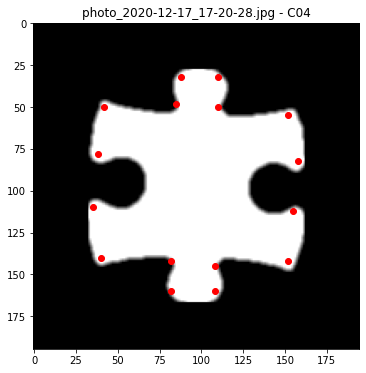

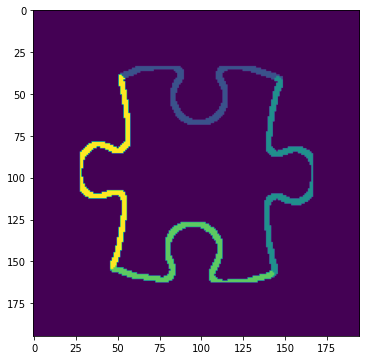

photo_2020-12-17_17-20-29.jpg


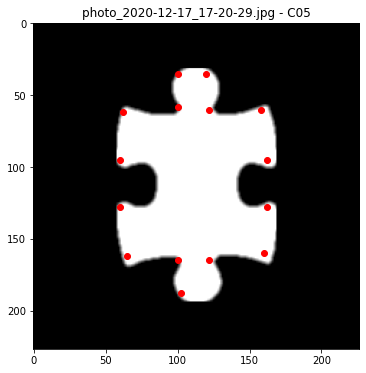

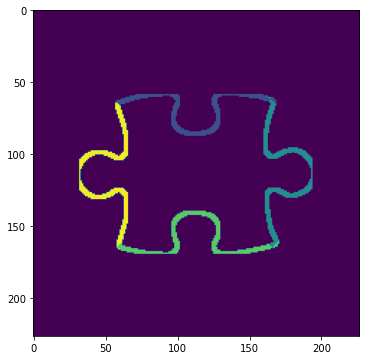

photo_2020-12-17_17-20-30.jpg


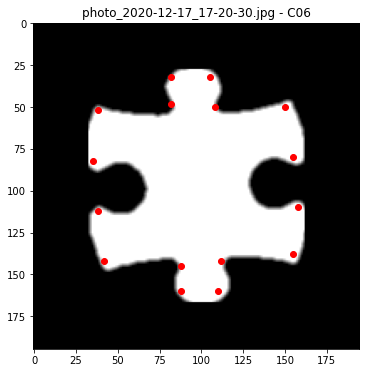

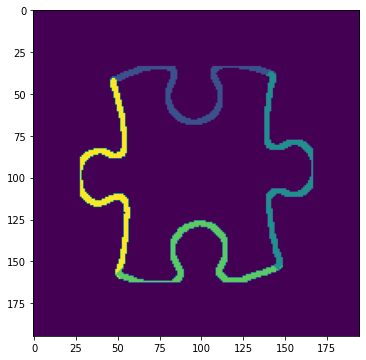

photo_2020-12-17_17-20-31.jpg


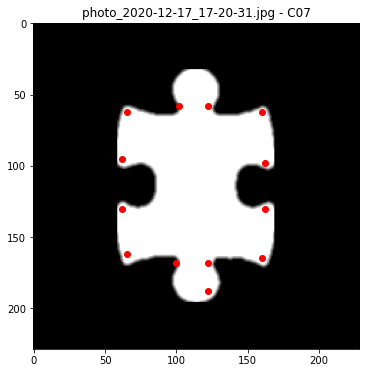

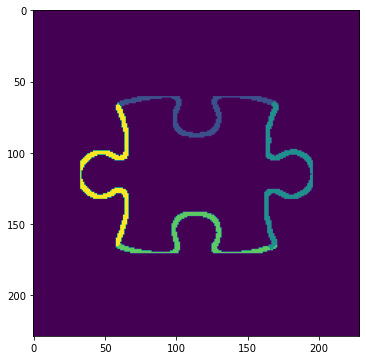

photo_2020-12-17_17-20-32.jpg


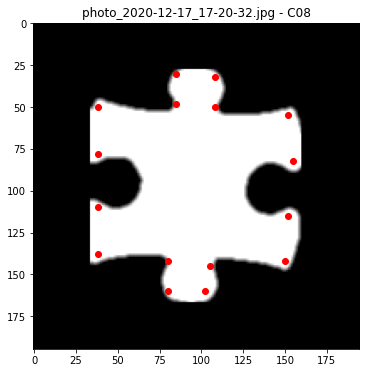

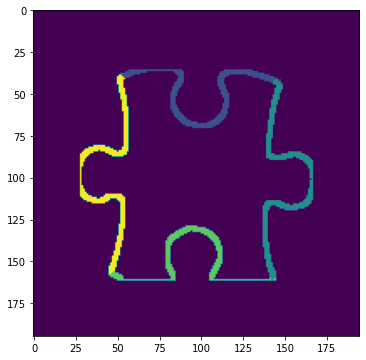

photo_2020-12-17_17-20-33.jpg


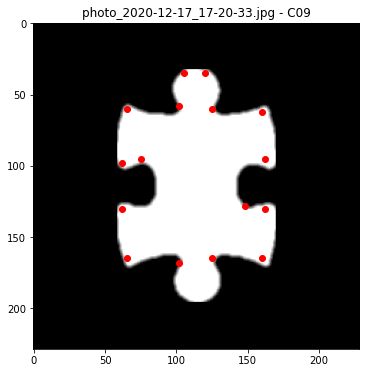

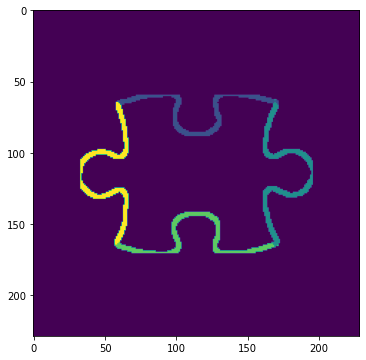

photo_2020-12-17_17-20-34.jpg


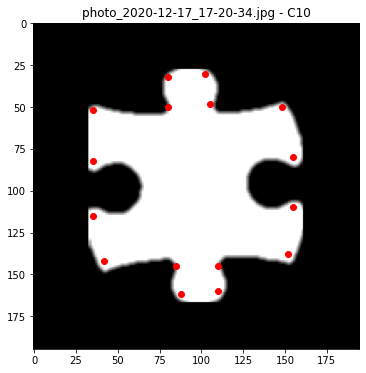

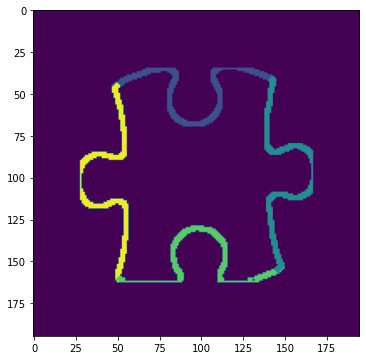

photo_2020-12-17_17-20-35.jpg


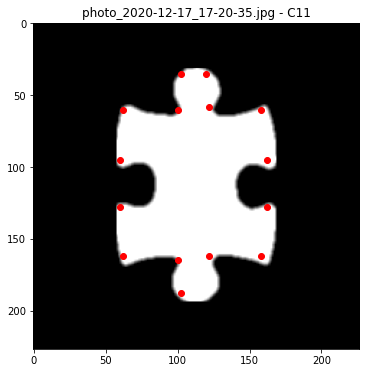

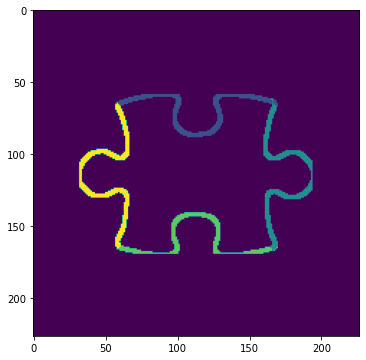

photo_2020-12-17_17-20-36.jpg


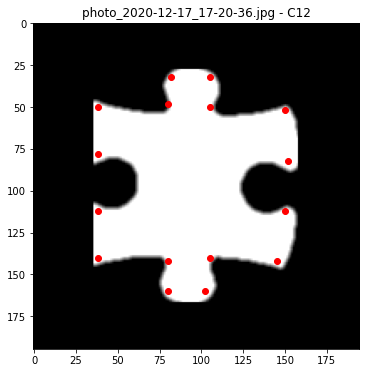

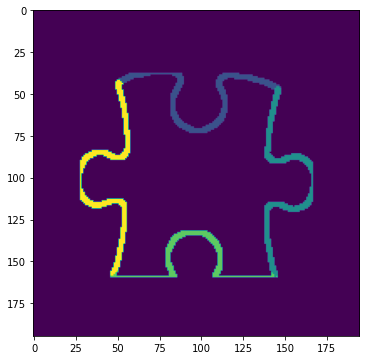

photo_2020-12-17_17-20-37.jpg


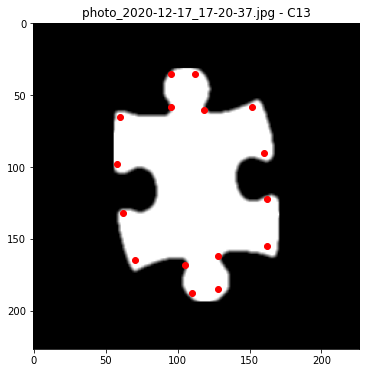

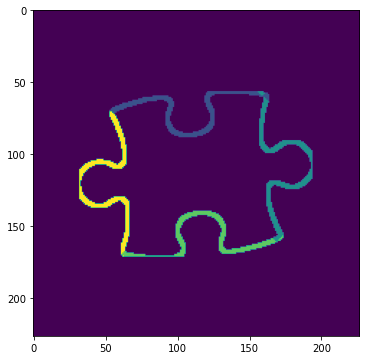

photo_2020-12-17_17-20-38.jpg


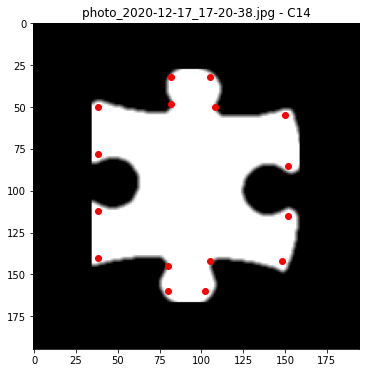

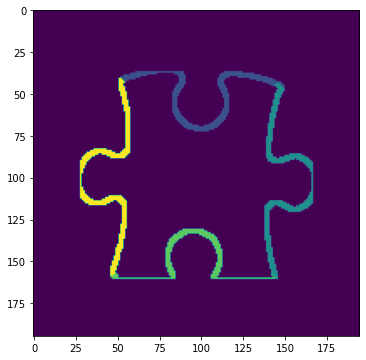

photo_2020-12-17_17-20-39.jpg


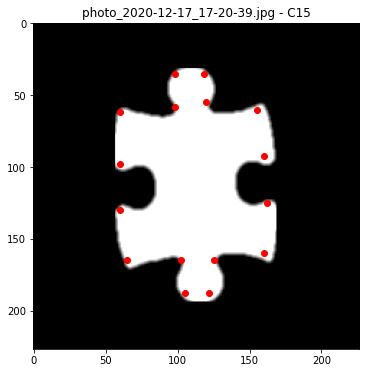

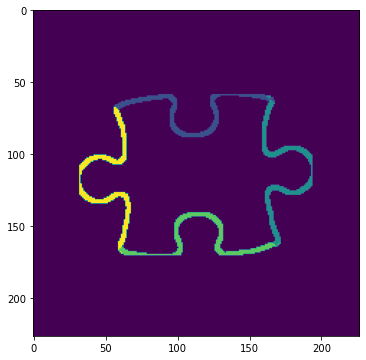

photo_2020-12-17_17-20-41.jpg


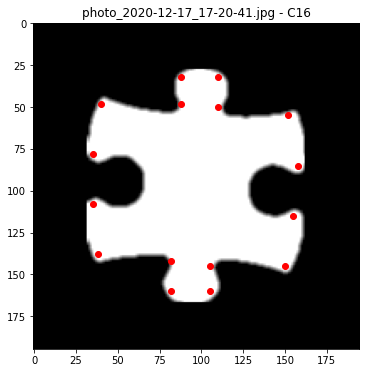

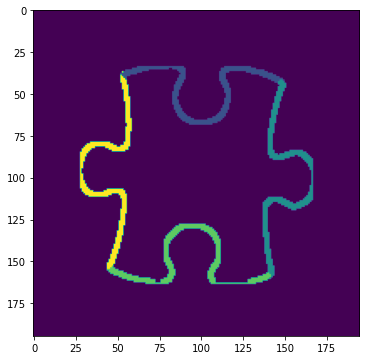

photo_2020-12-17_17-20-42.jpg


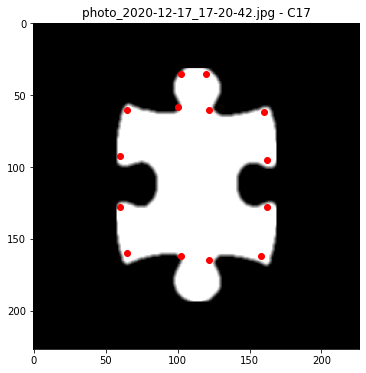

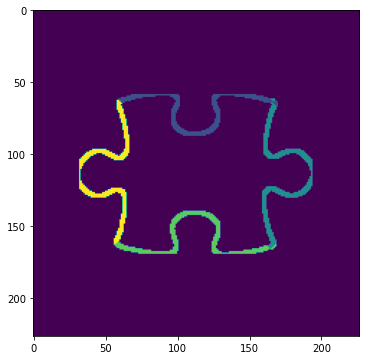

photo_2020-12-17_17-20-43.jpg


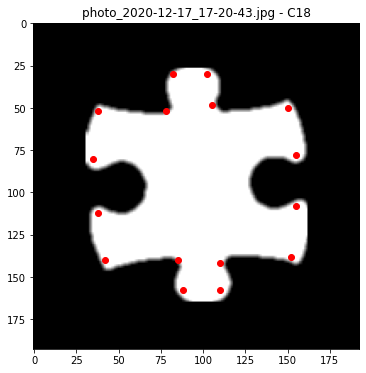

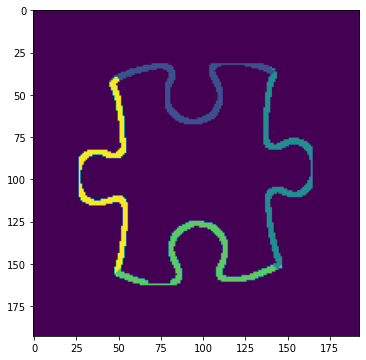

In [4]:
postprocess = partial(cv2.blur, ksize=(3, 3))
results = []
error_labels = []

for filename, label in zip(filenames, labels):
    if filename == ".DS_Store":
        continue
    print(filename)
    img = cv2.imread(join('underwater', filename))
    img = img[380:640, 210:430]
    
    # Original values: corner_score_threshold = 0.2, corner_minmax_threshold=100
    out_dict = process_piece(img, after_segmentation_func=postprocess, scale_factor=0.4, 
                             harris_block_size=5, harris_ksize=5,
                             corner_score_threshold=0.2, corner_minmax_threshold=100)
    
    plt.figure(figsize=(6, 6))
    plt.title("{0} - {1}".format(filename, label))
    plt.imshow(out_dict['extracted'], cmap='gray')
    # xy is a 2D array: Separate into 2 array with x-coordinates and y-coordinates
    plt.scatter(out_dict['xy'][:, 0], out_dict['xy'][:, 1], color='red')
    #plt.colorbar()
    plt.show()
    
    if 'error' in out_dict:
        print(label, ':', out_dict['error'])
        error_labels.append(label)
        traceback.print_exc()
        continue
        
    else:
        
        plt.figure(figsize=(6, 6))
        # plt.title("{0} - {1}".format(filename, label))
        plt.imshow(out_dict['class_image'])
        # plot_grid((3, 3), out_dict, '_segmented', '_extracted', '_edges', 'class_image')
        plt.show()

        # plot_side_images(out_dict['side_images'], out_dict['inout'])

        results.append({'side_images': out_dict['side_images'], 'inout': out_dict['inout']})

In [5]:
to_ignore = []
for el in error_labels:
    labels.remove(el)

for label, result in zip(labels, results):
    
    if label in to_ignore:
        continue
    
    for i, (side_image, io) in enumerate(zip(result['side_images'], result['inout']), start=1):
        
        out_io = 'int' if io == 'in' else 'out'
        side_image = side_image * 255
        
        
        out_filename = "{0}_{1}_{2}.jpg".format(label, i, out_io)
        out_path = join('sides', out_filename)
        
        #plt.imshow(side_image)
        #plt.show()
        cv2.imwrite(out_path, side_image)

print("Done!")

Done!
